In [1]:
from upscaler.data import load_train_test_data

from keras.models import load_model
from skimage import data, io
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm, tqdm_notebook
import numpy as np

#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
input_image_shape = (480,270,3)
output_image_shape = (1920,1080,3)
downscale_factor = 4

## Data

In [3]:
photo_input_dir = '../images/photo_fullhd'
ukiyo_input_dir = '../images/ukiyo-e_fullhd'
number_of_images = 100
train_test_ratio = 0.99

In [4]:
photo_lr, photo_hr, _, _ = load_train_test_data(photo_input_dir, '.jpg', number_of_images, train_test_ratio, input_image_shape, prog_func=tqdm_notebook)
ukiyo_lr, ukiyo_hr, _, _ = load_train_test_data(ukiyo_input_dir, '.jpg', number_of_images, train_test_ratio, input_image_shape, prog_func=tqdm_notebook)

## Results save

In [5]:
def save_array_as_image(a, filename, quality = 100):
    a = np.uint8(np.around((a + 1) * 127.5))
    a = np.swapaxes(a, 0, 1)
    a_img = Image.fromarray(a)
    a_img.save(filename, quality = quality)

def rescale_save_array_as_image(a, filename, quality = 100):
    a = np.uint8(np.around((a + 1) * 127.5))
    a = np.swapaxes(a, 0, 1)
    a_img = Image.fromarray(a)
    a_img = a_img.resize((1920, 1080), Image.BICUBIC)
    a_img.save(filename, quality = quality)

In [6]:
images_dir = "example_images"
subdir = "tmp"

def save_images_orig(lowres, highres, idx_start, idx_stop, prefix, quality = 100):
    
    for idx in range(idx_start, idx_stop + 1):
        ex = lowres[idx]
        rescale_save_array_as_image(ex, images_dir + '/' + subdir + '/' + prefix + "_im%04d_lowres.jpg" % idx, quality)

        ex = highres[idx]
        save_array_as_image(ex, images_dir + '/' + subdir + '/' + prefix + "_im%04d_orig.jpg" % idx, quality)

def save_images_predicted(lowres, upscaler, idx_start, idx_stop, prefix, quality = 100):
    
    for idx in range(idx_start, idx_stop + 1):
        ex = upscaler.predict(lowres[[idx]])[0]
        save_array_as_image(ex, images_dir + '/' + subdir + '/' + prefix + "_im%04d_upscaled.jpg" % idx, quality)

## Loading a photo model

In [7]:
upscaler = load_model('trained_model/photo/orig_vgg-mse/model_upscaler_orig_vgg-mse_best.h5')

W0923 22:57:57.597090 4653213120 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 22:57:57.648799 4653213120 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0923 22:57:57.691930 4653213120 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 22:57:57.692519 4653213120 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.

In [ ]:
save_images_orig(photo_lr, photo_hr, 0, 10, 'photo_on_photo')
save_images_predicted(photo_lr, upscaler, 0, 10, 'photo_on_photo')
save_images_orig(ukiyo_lr, ukiyo_hr, 0, 10, 'photo_on_ukiyo')
save_images_predicted(ukiyo_lr, upscaler, 0, 10, 'photo_on_ukiyo')

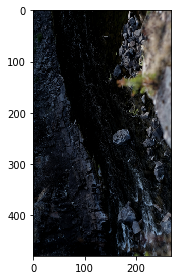

In [8]:
ex = photo_lr[2]
rescale_save_array_as_image(ex, "example_images/photo_on_photo_lowres.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

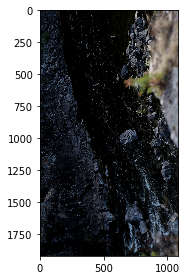

In [9]:
ex = photo_hr[2]
save_array_as_image(ex, "example_images/photo_on_photo_orig.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

In [ ]:
ex = upscaler.predict(photo_lr[[2]])[0]

save_array_as_image(ex, "example_images/photo_on_photo_upscaled.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

In [ ]:
ex = ukiyo_lr[11]
rescale_save_array_as_image(ex, "example_images/photo_on_ukiyo_lowres.jpg")

ex = (ex + 1)/2
ex = ex.swapaxes(0,1)

io.imshow(ex)

In [ ]:
ex = ukiyo_hr[11]
save_array_as_image(ex, "example_images/photo_on_ukiyo_orig.jpg")

ex = (ex + 1)/2
ex = ex.swapaxes(0,1)

io.imshow(ex)

In [ ]:
ex = upscaler.predict(ukiyo_lr[[11]])[0]
save_array_as_image(ex, "example_images/photo_on_ukiyo_upscaled.jpg")

ex = (ex + 1)/2
ex = ex.swapaxes(0,1)

io.imshow(ex)

## Loading an ukiyo model

In [34]:
upscaler = load_model('trained_model/ukiyo/skip-con_vgg-mae/model_upscaler_skip-con_vgg-mae_030000b.h5')

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [35]:
save_images_orig(photo_lr, photo_hr, 0, 10, 'ukiyo_on_photo')
save_images_predicted(photo_lr, upscaler, 0, 10, 'ukiyo_on_photo')
save_images_orig(ukiyo_lr, ukiyo_hr, 0, 10, 'ukiyo_on_ukiyo')
save_images_predicted(ukiyo_lr, upscaler, 0, 10, 'ukiyo_on_ukiyo')

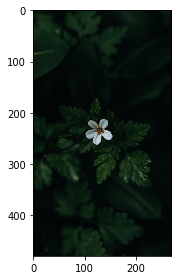

In [36]:
ex = photo_lr[2]
rescale_save_array_as_image(ex, "example_images/ukiyo_on_photo_lowres.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

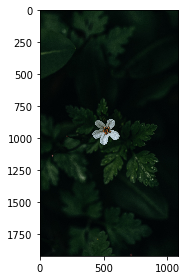

In [37]:
ex = photo_hr[2]
save_array_as_image(ex, "example_images/ukiyo_on_photo_orig.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

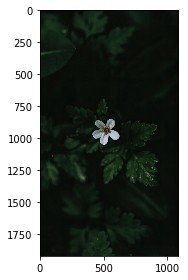

In [38]:
ex = upscaler.predict(photo_lr[[2]])[0]
save_array_as_image(ex, "example_images/ukiyo_on_photo_upscaled.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

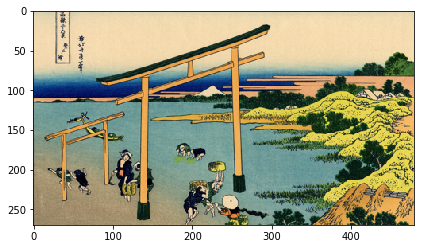

In [39]:
ex = ukiyo_lr[11]
rescale_save_array_as_image(ex, "example_images/ukiyo_on_ukiyo_lowres.jpg")

ex = (ex + 1)/2
ex = ex.swapaxes(0,1)

io.imshow(ex)

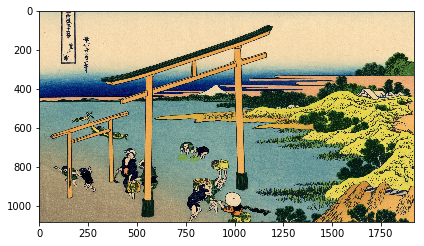

In [40]:
ex = ukiyo_hr[11]
save_array_as_image(ex, "example_images/ukiyo_on_ukiyo_orig.jpg")

ex = (ex + 1)/2
ex = ex.swapaxes(0,1)

io.imshow(ex)

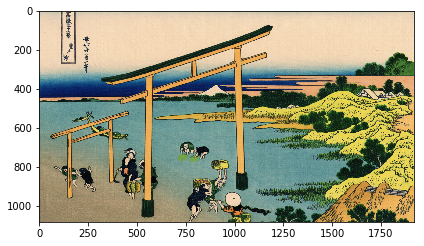

In [41]:
ex = upscaler.predict(ukiyo_lr[[11]])[0]
save_array_as_image(ex, "example_images/ukiyo_on_ukiyo_upscaled.jpg")

ex = (ex + 1)/2
ex = ex.swapaxes(0,1)

io.imshow(ex)